<h2>Test models</h2>

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.16.1


In [9]:
# Definiowanie ścieżki do danych i modeli
data_dir = 'SPLIT_1'  # Zmień to na właściwą ścieżkę
model_paths = ['MODEL1.keras', 'MODEL2.keras', 'MODEL3.keras']

# Ładowanie modeli
models = [tf.keras.models.load_model(path) for path in model_paths]

# Tworzenie modelu przetwarzania wstępnego z ResNet50
# base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
# preprocessing_model = Model(inputs=base_model.input, outputs=base_model.output)

# Tworzenie ImageDataGenerator do ładowania i wstępnego przetwarzania obrazów
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)  # Użycie preprocessing_function

# Ładowanie danych
train_ds = tf.keras.utils.image_dataset_from_directory(
      f"{data_dir}/training",
      batch_size=16,
      image_size=(64, 64),
)
val_ds = tf.keras.utils.image_dataset_from_directory(
      f"{data_dir}/validation",
      batch_size=16,
      image_size=(64, 64),
)
test_ds = tf.keras.utils.image_dataset_from_directory(
      f"{data_dir}/testing",
      batch_size=16,
      image_size=(64, 64),
)

AUTOTUNE = tf.data.AUTOTUNE

class_names = train_ds.class_names

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 16181 files belonging to 5 classes.
Found 250 files belonging to 5 classes.
Found 250 files belonging to 5 classes.


Ocena modeli

Model 1
Test data:
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

     chicken       0.91      0.82      0.86        49
       horse       0.87      1.00      0.93        34
        none       0.94      0.91      0.92        65
       sheep       0.90      0.78      0.84        23
      spider       0.87      0.92      0.90        79

    accuracy                           0.90       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.90      0.90       250



2024-05-20 12:39:37.588111: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


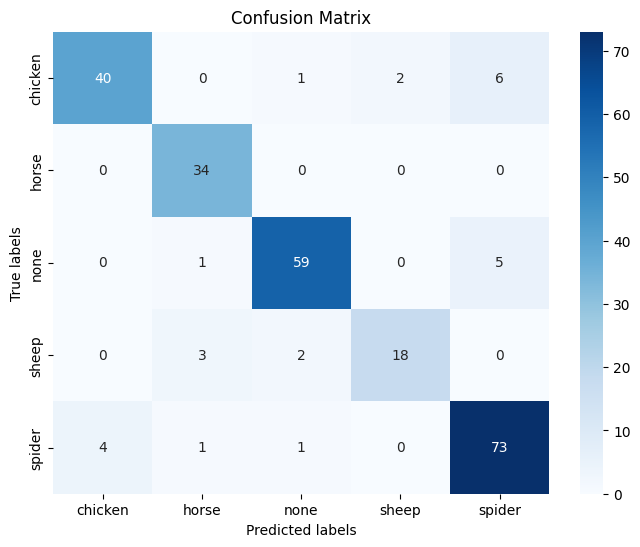

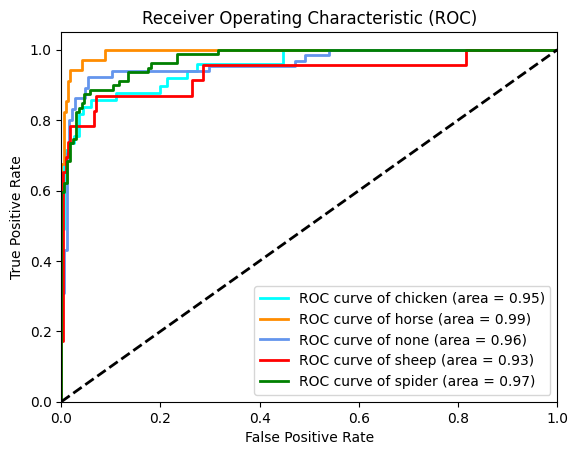

Model 1
Train data:
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

     chicken       1.00      0.99      0.99      3003
       horse       0.99      1.00      0.99      2543
        none       1.00      0.99      0.99      4194
       sheep       0.99      0.99      0.99      1769
      spider       0.99      1.00      0.99      4672

    accuracy                           0.99     16181
   macro avg       0.99      0.99      0.99     16181
weighted avg       0.99      0.99      0.99     16181



2024-05-20 12:39:39.854481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


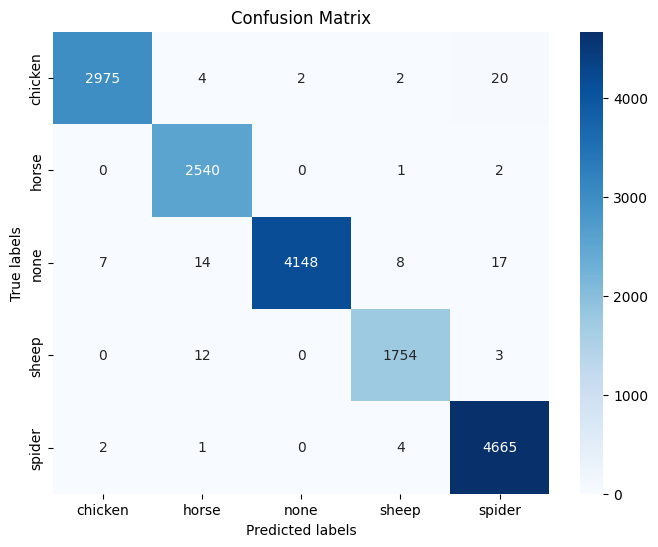

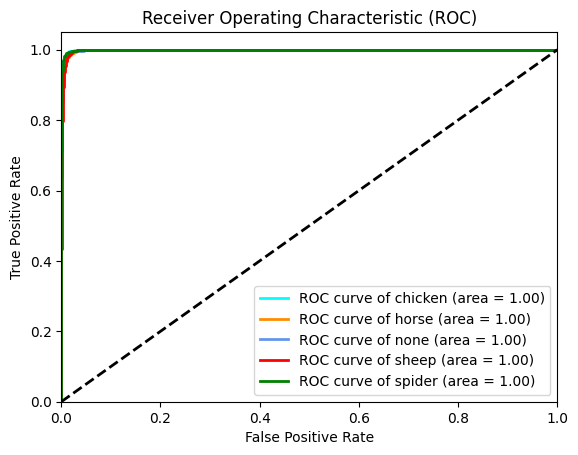

Model 1
Validation data:
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

     chicken       0.91      0.82      0.86        49
       horse       0.87      1.00      0.93        34
        none       0.94      0.91      0.92        65
       sheep       0.90      0.78      0.84        23
      spider       0.87      0.92      0.90        79

    accuracy                           0.90       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.90      0.90       250



2024-05-20 12:39:40.114278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


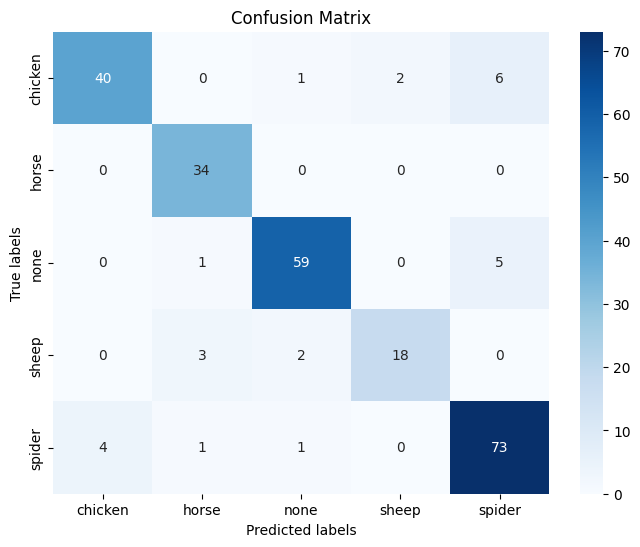

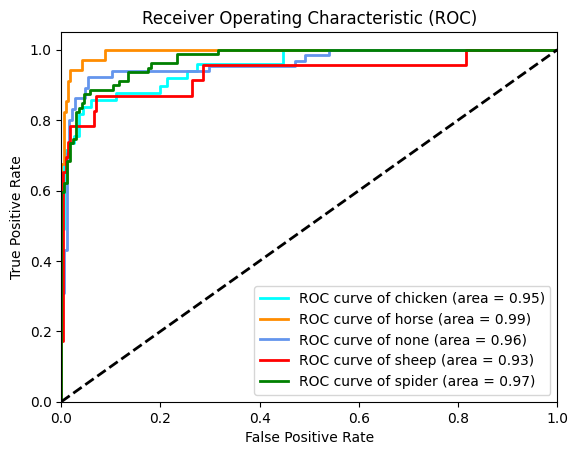

Model 2
Test data:
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

     chicken       0.95      0.80      0.87        49
       horse       0.78      0.91      0.84        34
        none       0.91      0.94      0.92        65
       sheep       0.72      0.78      0.75        23
      spider       0.92      0.90      0.91        79

    accuracy                           0.88       250
   macro avg       0.86      0.87      0.86       250
weighted avg       0.89      0.88      0.88       250



2024-05-20 12:39:40.733983: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


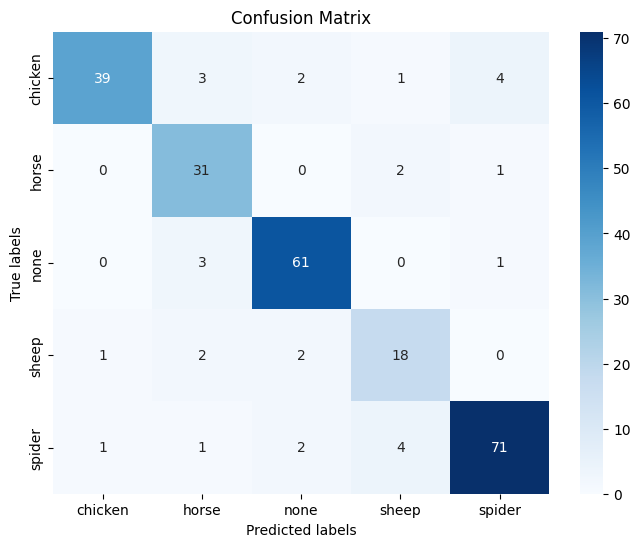

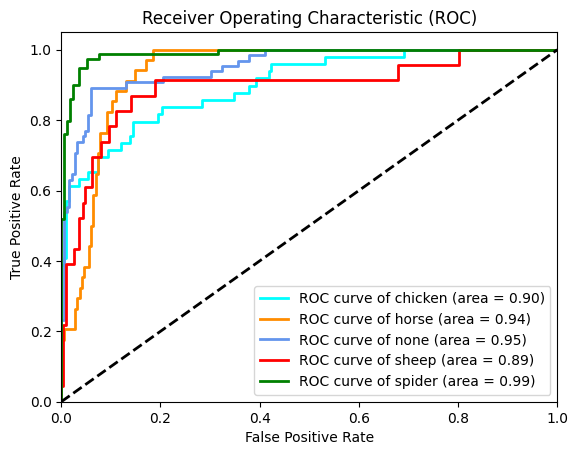

Model 2
Train data:
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

     chicken       0.99      0.99      0.99      3003
       horse       0.99      0.99      0.99      2543
        none       0.99      1.00      0.99      4194
       sheep       0.99      0.98      0.99      1769
      spider       0.99      1.00      0.99      4672

    accuracy                           0.99     16181
   macro avg       0.99      0.99      0.99     16181
weighted avg       0.99      0.99      0.99     16181



2024-05-20 12:39:43.307842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


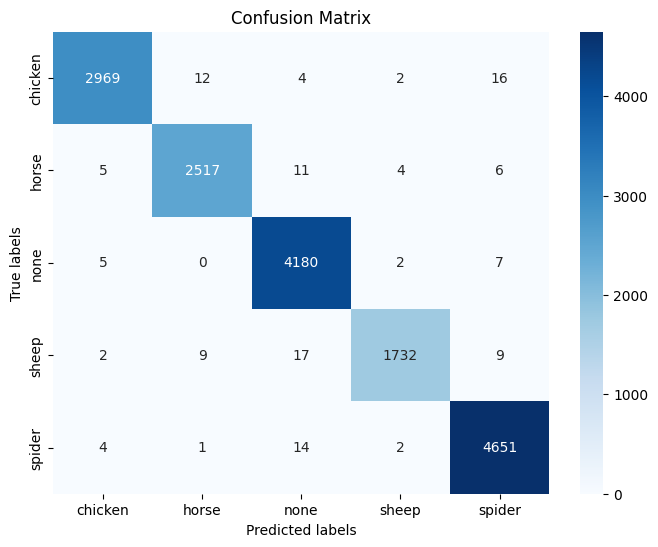

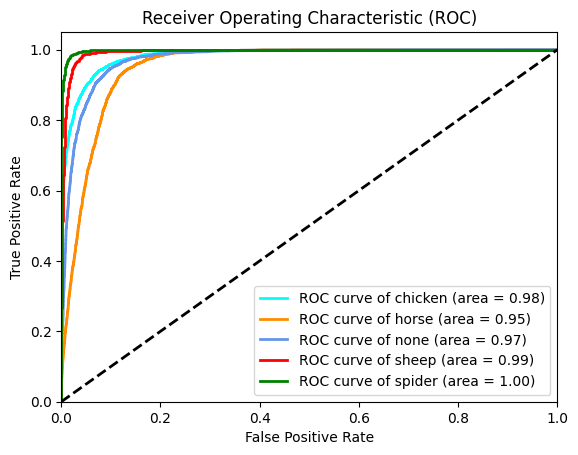

Model 2
Validation data:
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

     chicken       0.95      0.80      0.87        49
       horse       0.78      0.91      0.84        34
        none       0.91      0.94      0.92        65
       sheep       0.72      0.78      0.75        23
      spider       0.92      0.90      0.91        79

    accuracy                           0.88       250
   macro avg       0.86      0.87      0.86       250
weighted avg       0.89      0.88      0.88       250



2024-05-20 12:39:43.581839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


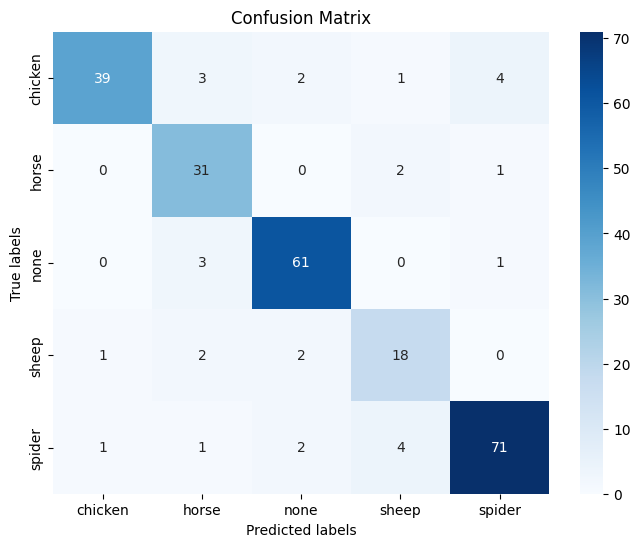

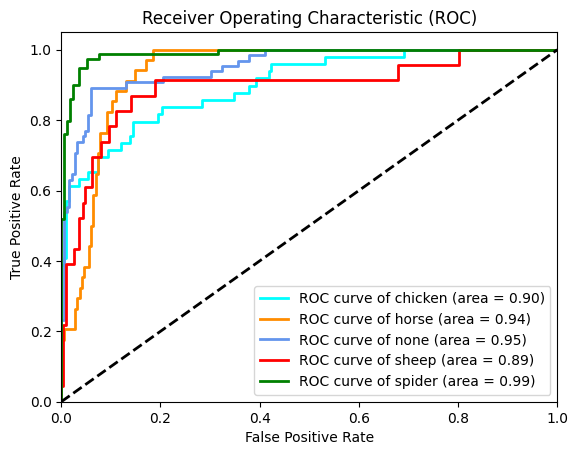

Model 3
Test data:
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

     chicken       1.00      1.00      1.00        49
       horse       1.00      1.00      1.00        34
        none       1.00      1.00      1.00        65
       sheep       1.00      1.00      1.00        23
      spider       1.00      1.00      1.00        79

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



2024-05-20 12:39:44.215639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


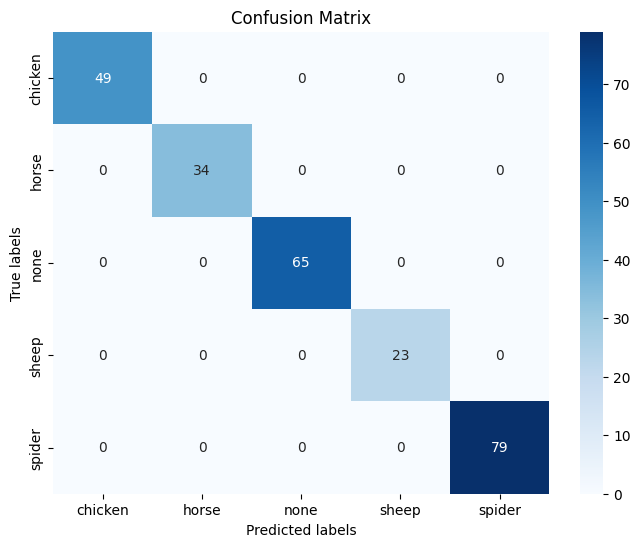

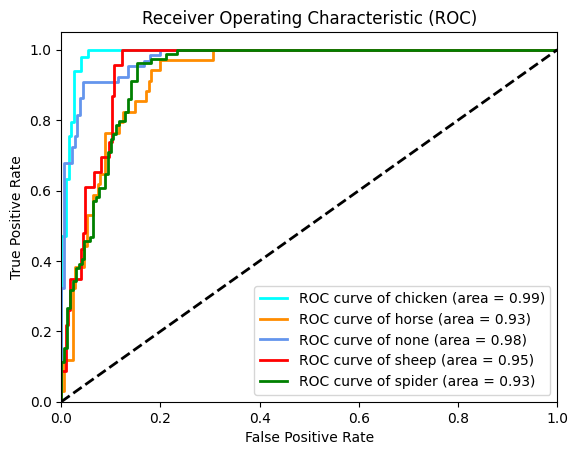

Model 3
Train data:
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

     chicken       0.99      0.99      0.99      3003
       horse       0.98      1.00      0.99      2543
        none       1.00      0.99      1.00      4194
       sheep       0.99      0.98      0.98      1769
      spider       0.99      1.00      0.99      4672

    accuracy                           0.99     16181
   macro avg       0.99      0.99      0.99     16181
weighted avg       0.99      0.99      0.99     16181



2024-05-20 12:39:47.377872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


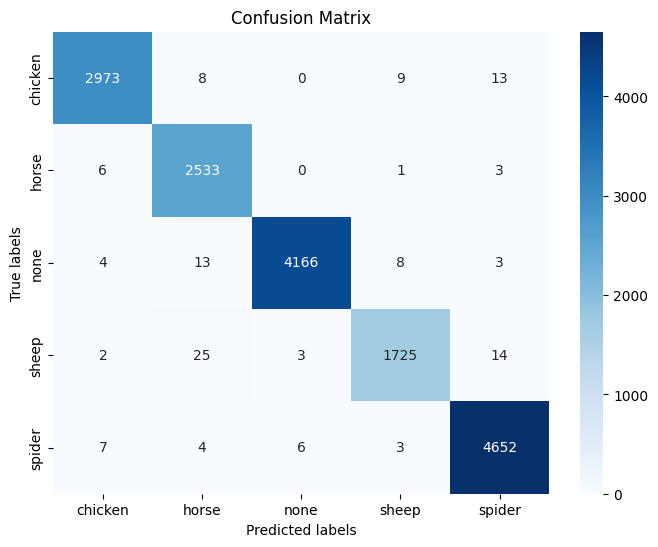

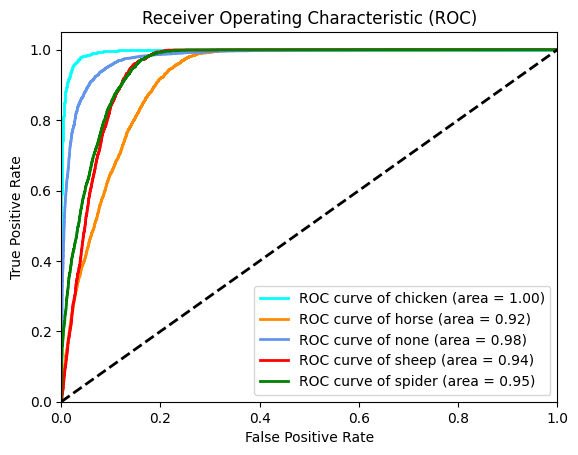

Model 3
Validation data:
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

     chicken       1.00      1.00      1.00        49
       horse       1.00      1.00      1.00        34
        none       1.00      1.00      1.00        65
       sheep       1.00      1.00      1.00        23
      spider       1.00      1.00      1.00        79

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



2024-05-20 12:39:47.647602: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


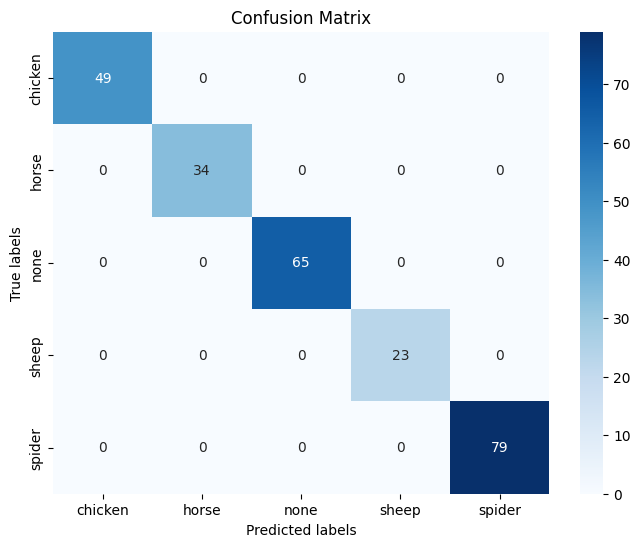

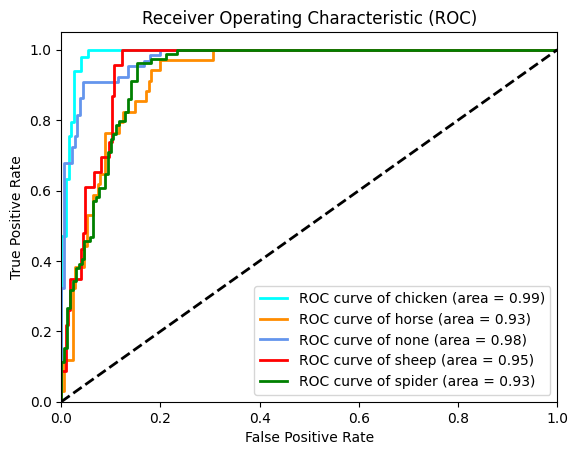

In [10]:
def evaluate_model(model, test_ds, class_names):
    # Przewidywanie etykiet dla danych testowych
    y_pred = model.predict(test_ds, batch_size=64, verbose=1)
    
    # Konwersja przewidywanych etykiet na wartości binarne
    y_pred_bool = np.argmax(y_pred, axis=1)
    
    # Tworzenie etykiet dla danych testowych
    y_true = []
    for images, labels in test_ds:
        y_true.extend(labels.numpy())
    
    y_true = np.array(y_true)
    
    # Wyświetlanie raportu klasyfikacji z nazwami klas
    print(classification_report(y_true, y_pred_bool, target_names=class_names))

    # # Obliczenie macierzy pomyłek
    conf_mat = confusion_matrix(y_true, y_pred_bool)
    
    # Wyświetlenie macierzy pomyłek jako heatmapy z nazwami klas
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Konwersja y_true na format binarny dla ROC
    n_classes = len(class_names)
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    y_pred_bin = label_binarize(y_pred_bool, classes=range(n_classes))

    # Obliczenie punktów na krzywej ROC dla każdej klasy
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Narysowanie krzywej ROC dla każdej klasy
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of {0} (area = {1:0.2f})'
                 ''.format(class_names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Obliczenie metryk dla każdego modelu
for i, model in enumerate(models):
    print('Model ' + str(i + 1))
    print('Test data:')
    evaluate_model(model, test_ds, class_names)
    
    print('Model ' + str(i + 1))
    print('Train data:')
    evaluate_model(model, train_ds, class_names)

    print('Model ' + str(i + 1))
    print('Validation data:')
    evaluate_model(model, val_ds, class_names)

In [8]:
accuracy = models[1].evaluate(train_ds, verbose=0)[1]
print(round(accuracy, 3))

0.992
